In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('datasets/TwitCID/firstweek_features_binary.csv').drop('Unnamed: 0', axis=1)

In [ ]:
df.columns

Index(['Has_location', 'Has_username', 'Followers', 'Followees', 'Age_account',
       'Total_tweets', 'Favourite', 'Groups', 'Has_Image', 'Aver_favourite',
       'Length_tweet', 'Aver_tweets', 'Contain_URL', 'Name_length',
       'Sent_level', 'Has_Uword', 'Posted_holiday', 'Has_number', 'Has_rt',
       'Has_org', 'Has_tvshow', 'Posted_noon', 'Posted_weeke', 'Posted_eve',
       'Has_excl', 'Num_hashtag', 'Opt_len', 'Has_suggest', 'Has_video',
       '@@class@@'],
      dtype='object')

In [ ]:
unique, counts = np.unique(df['@@class@@'], return_counts=True)

In [ ]:
def autopct(a):
    return f'{a:.2f}%'

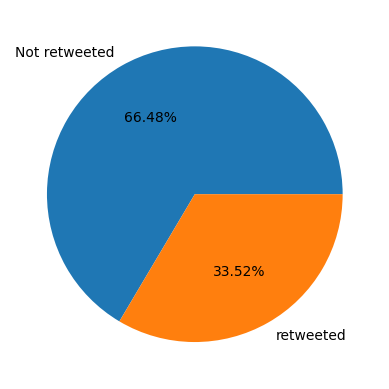

In [ ]:
# class distribution
plt.pie(counts, labels=['Not retweeted', 'retweeted'], autopct=autopct)

In [ ]:
# list of continuous columns
continuous_cols = ['Followers',
                 'Followees',
                 'Age_account',
                 'Total_tweets',
                 'Favourite', 
                 'Groups', 
                 'Aver_favourite', 
                 'Length_tweet',
                 'Aver_tweets',
                 'Name_length',
                 '@@class@@']

In [ ]:
continuous = df[continuous_cols]
discrete = df.drop(continuous_cols, axis=1)

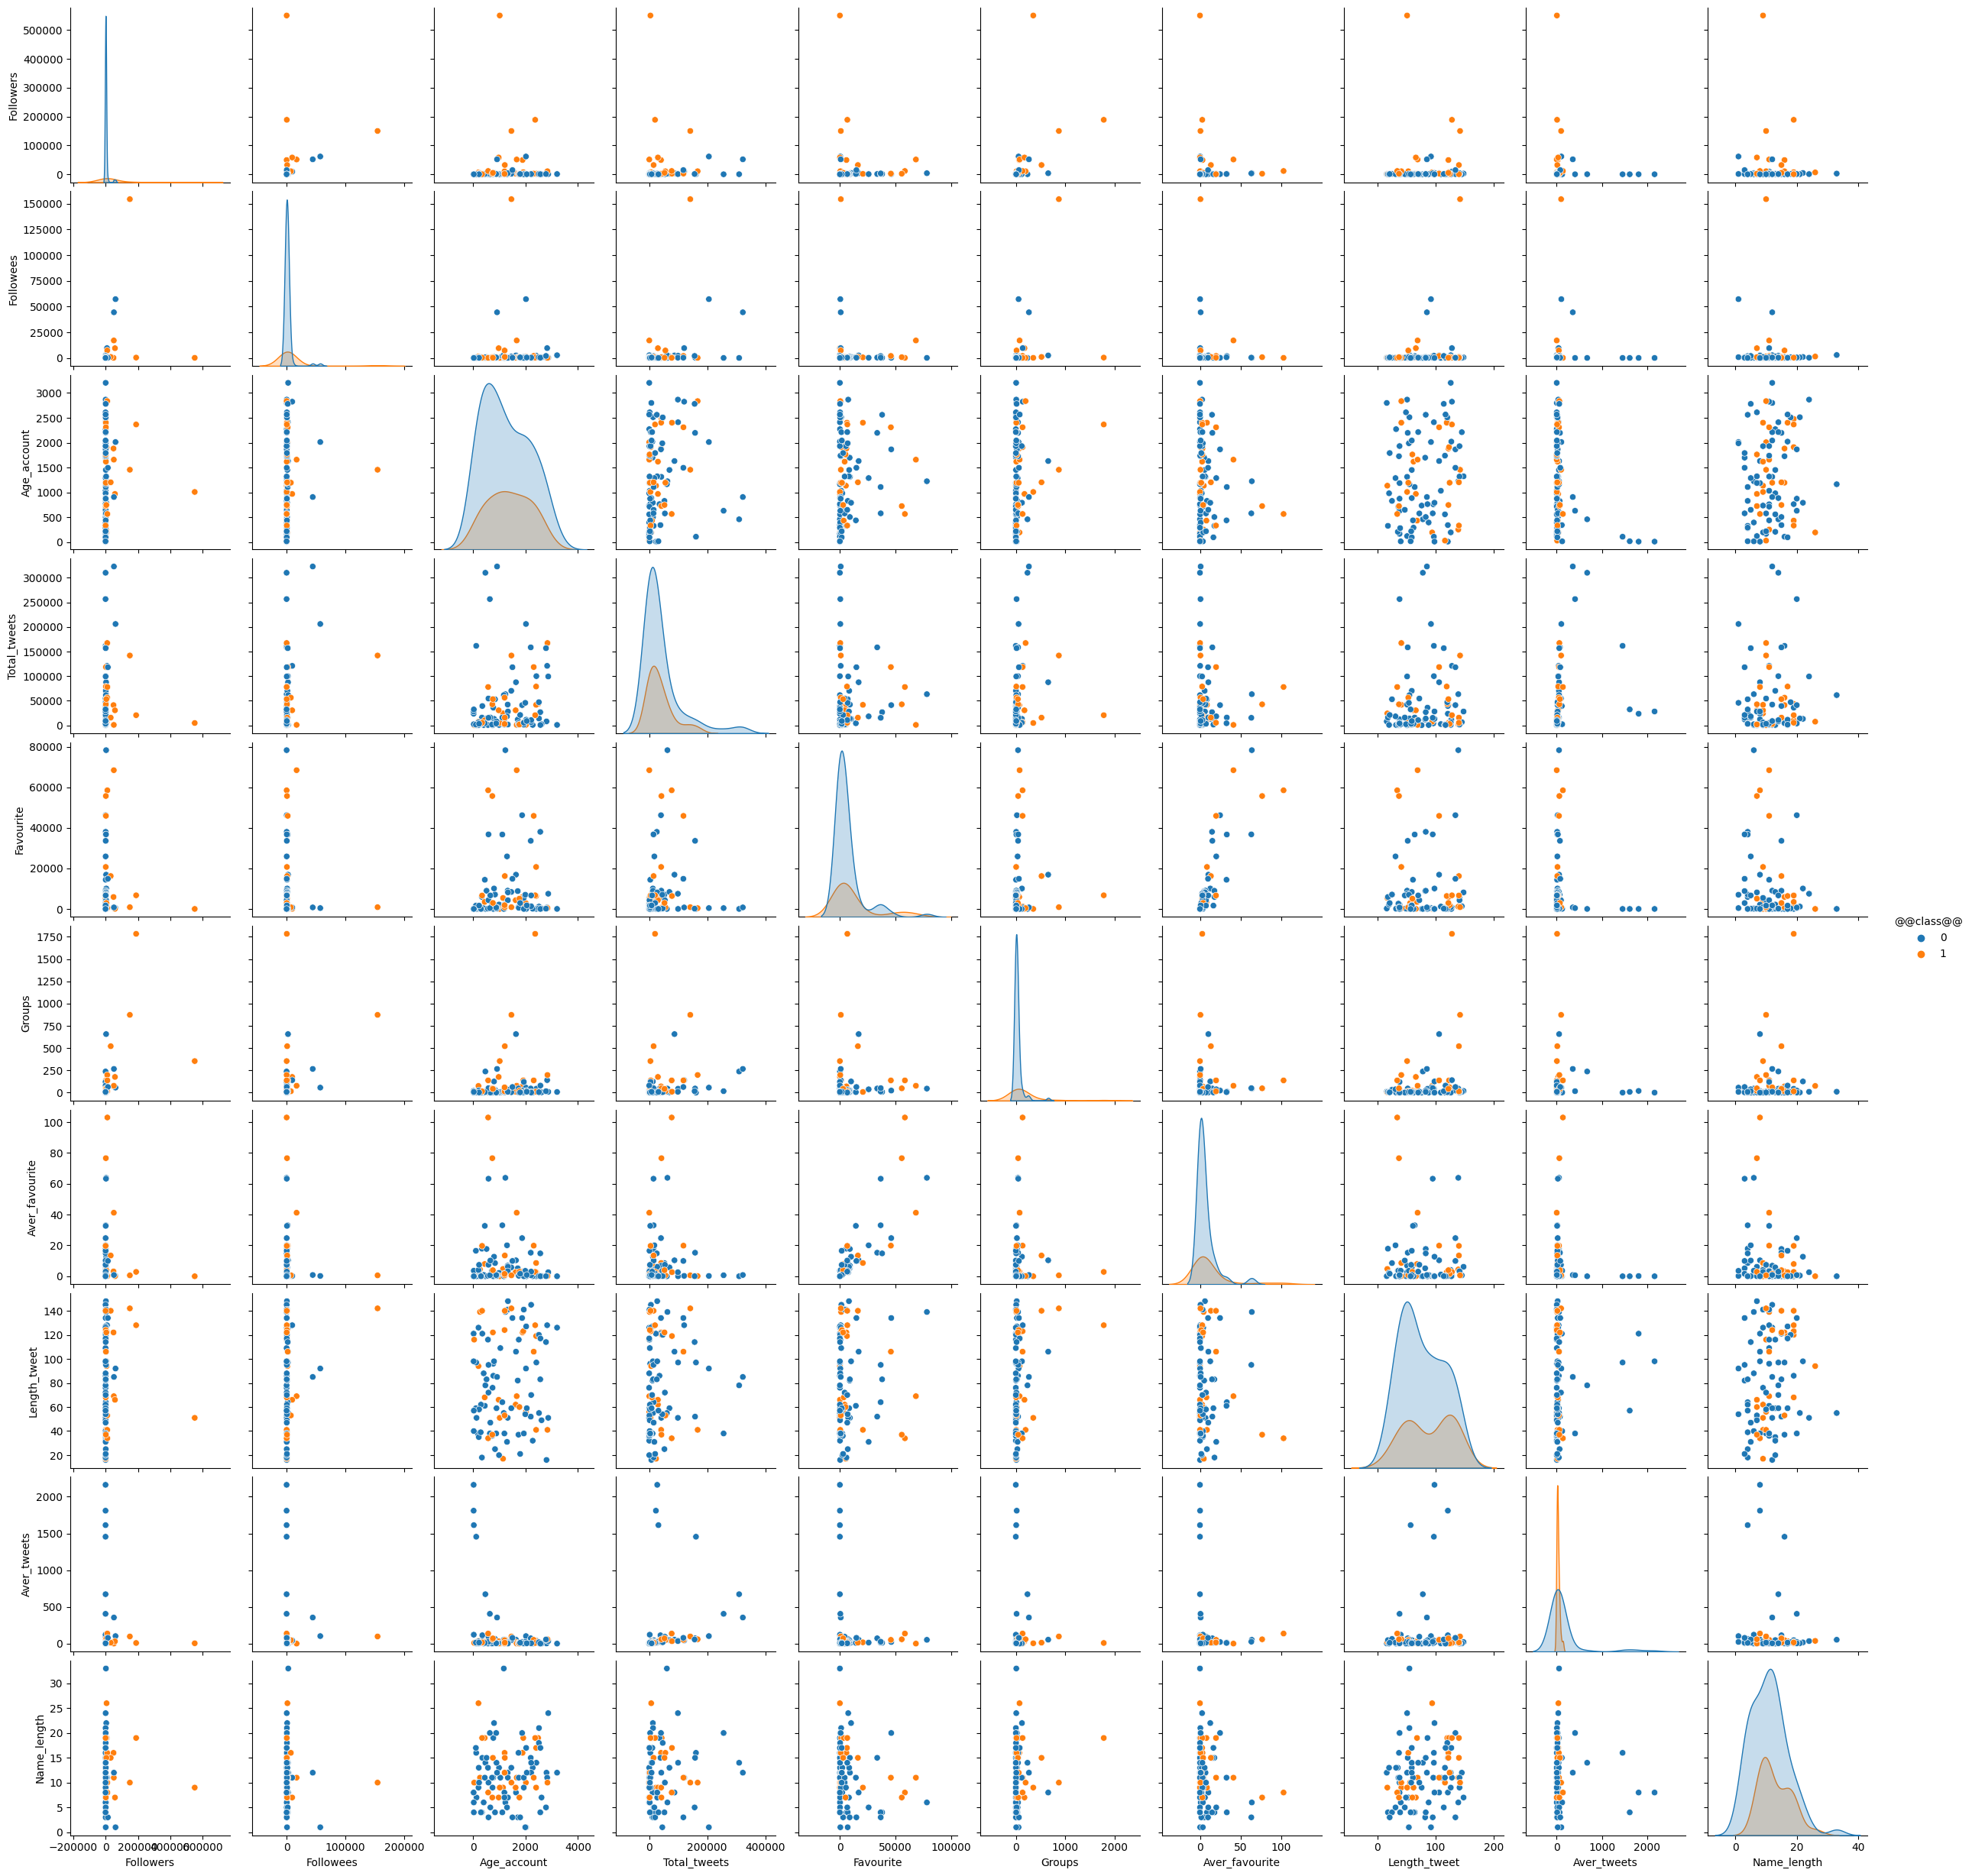

In [ ]:
p = sns.pairplot(continuous.sample(100), hue="@@class@@")

(-1125.6494274589118, 5000.0)

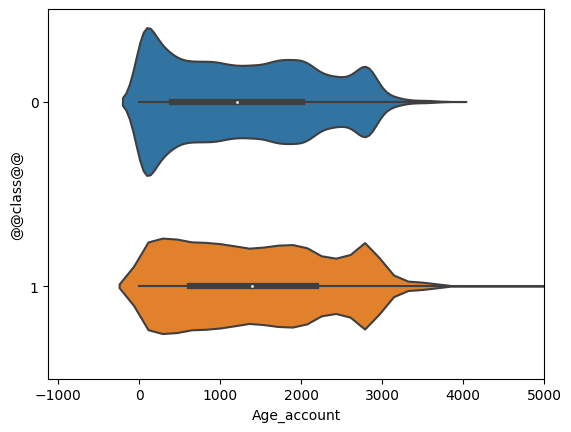

In [ ]:
ax = sns.violinplot(x=df['Age_account'], y=df['@@class@@'].astype('category'));
ax.set_xlim(xmax=5000)

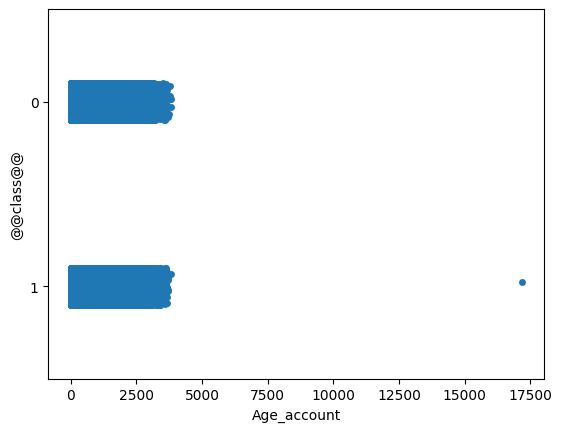

In [ ]:
sns.stripplot(x=df['Age_account'], y=df['@@class@@'].astype('category'));

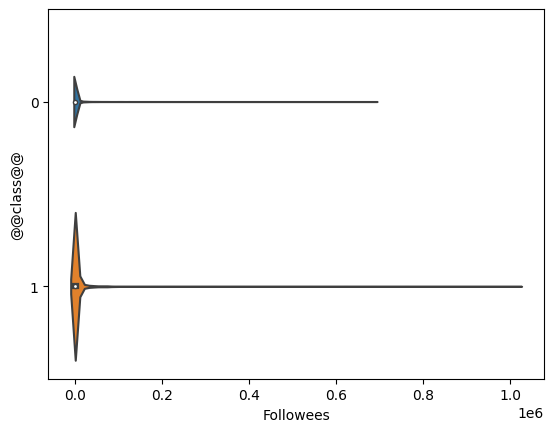

In [ ]:
sns.violinplot(x=df['Followees'], y=df['@@class@@'].astype('category'));

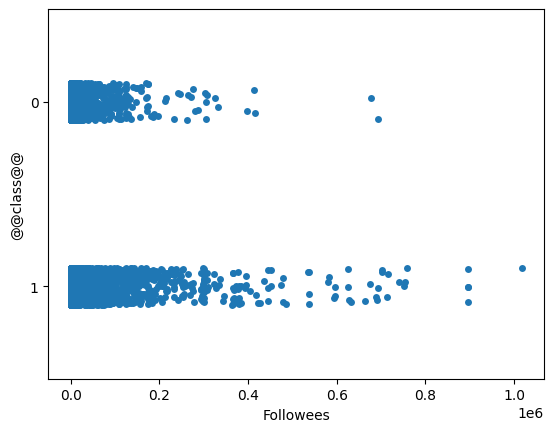

In [ ]:
sns.stripplot(x=df['Followees'], y=df['@@class@@'].astype('category'))

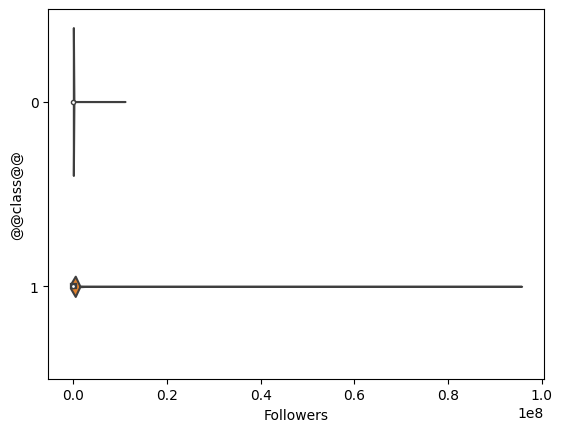

In [ ]:
sns.violinplot(x=df['Followers'], y=df['@@class@@'].astype('category'));

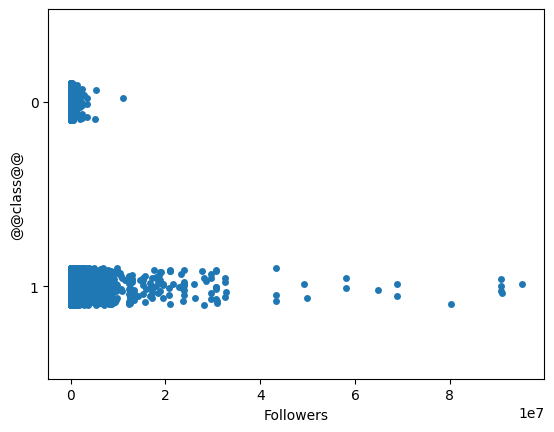

In [ ]:
sns.stripplot(x=df['Followers'], y=df['@@class@@'].astype('category'))

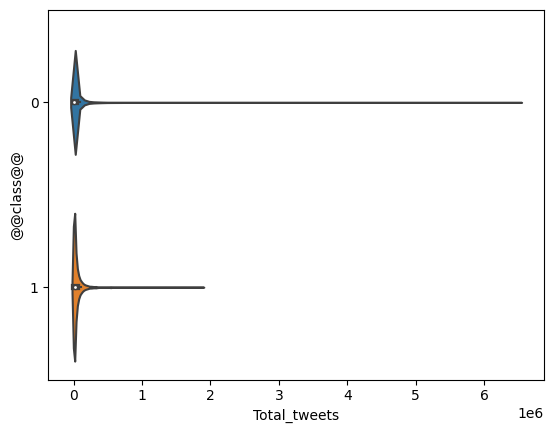

In [ ]:
sns.violinplot(x=df['Total_tweets'], y=df['@@class@@'].astype('category'))

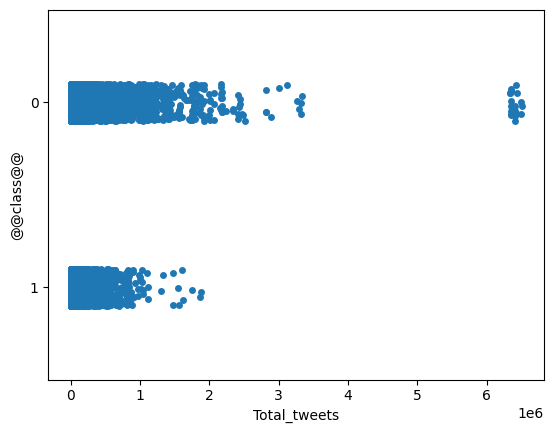

In [ ]:
sns.stripplot(x=df['Total_tweets'], y=df['@@class@@'].astype('category'));

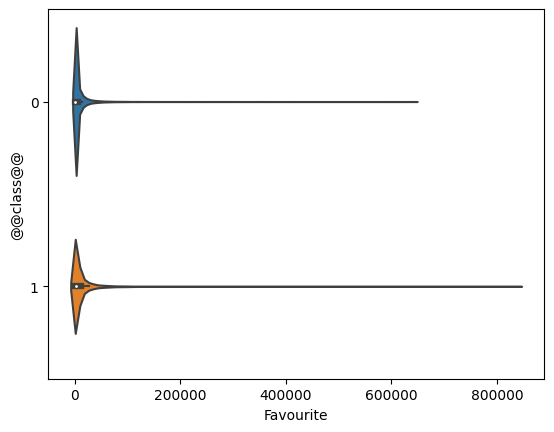

In [ ]:
sns.violinplot(x=df['Favourite'], y=df['@@class@@'].astype('category'))

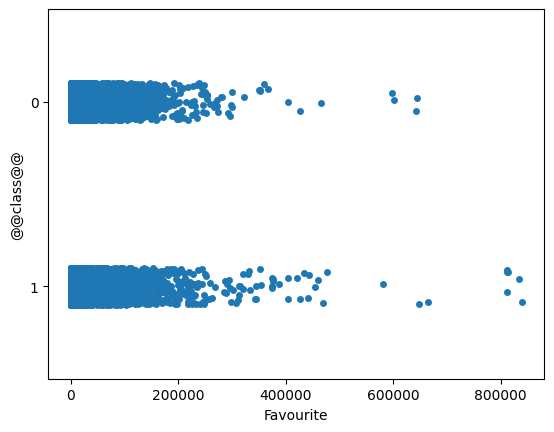

In [ ]:
sns.stripplot(x=df['Favourite'], y=df['@@class@@'].astype('category'))

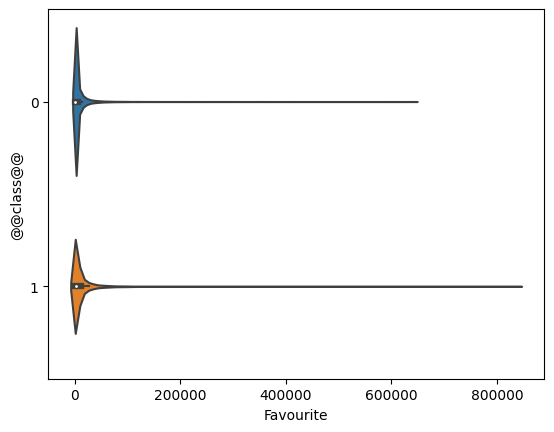

In [ ]:
sns.violinplot(x=df['Favourite'], y=df['@@class@@'].astype('category'))

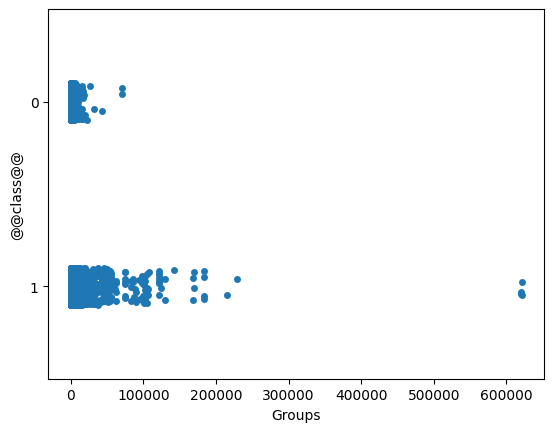

In [ ]:
sns.stripplot(x=df['Groups'], y=df['@@class@@'].astype('category'))

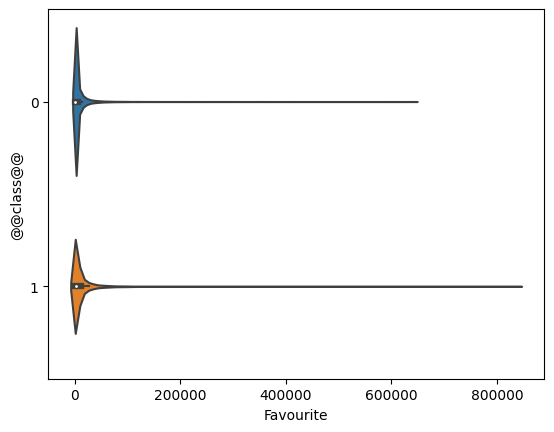

In [ ]:
sns.violinplot(x=df['Favourite'], y=df['@@class@@'].astype('category'))

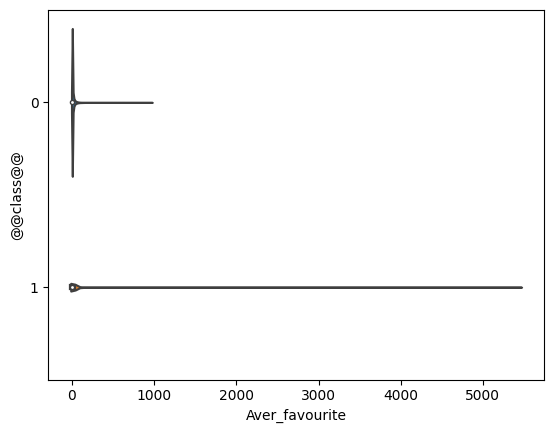

In [ ]:
sns.violinplot(x=df['Aver_favourite'], y=df['@@class@@'].astype('category'))

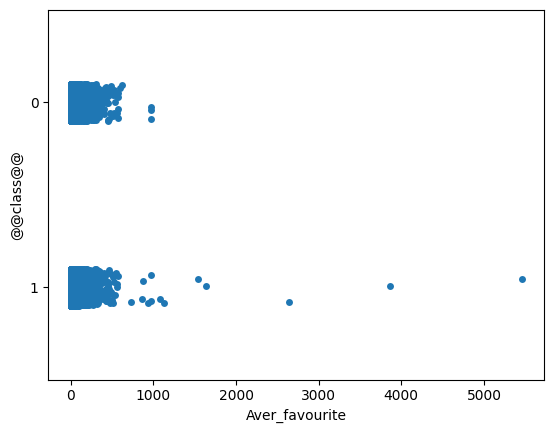

In [ ]:
sns.stripplot(x=df['Aver_favourite'], y=df['@@class@@'].astype('category'))

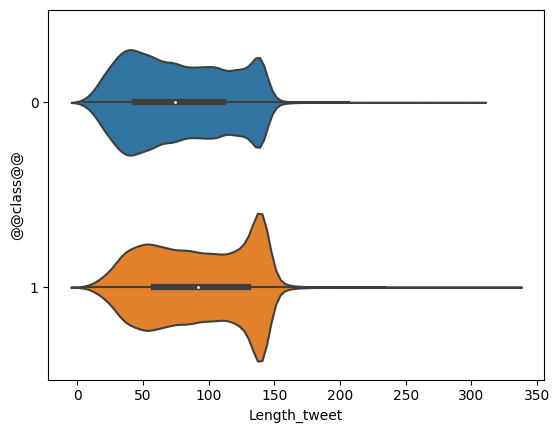

In [ ]:
sns.violinplot(x=df['Length_tweet'], y=df['@@class@@'].astype('category'))

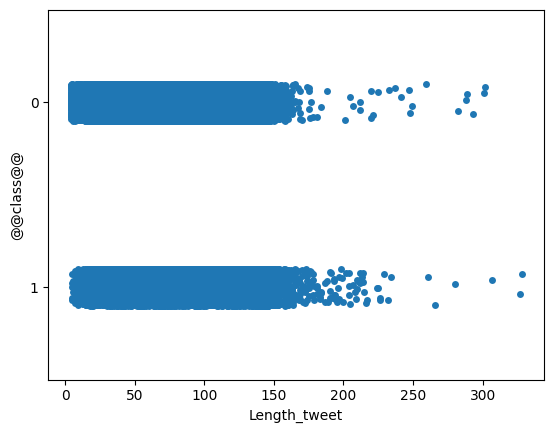

In [ ]:
sns.stripplot(x=df['Length_tweet'], y=df['@@class@@'].astype('category'))

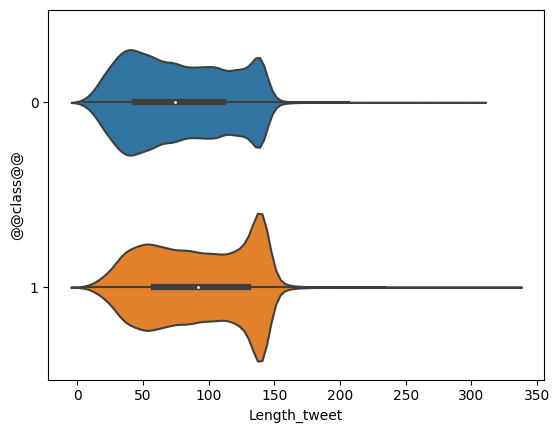

In [ ]:
sns.violinplot(x=df['Length_tweet'], y=df['@@class@@'].astype('category'))

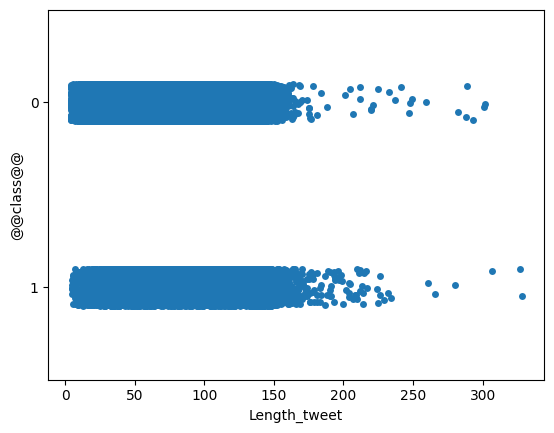

In [ ]:
sns.stripplot(x=df['Length_tweet'], y=df['@@class@@'].astype('category'))

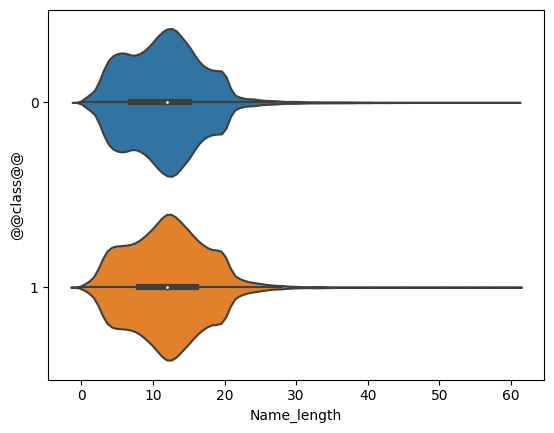

In [ ]:
sns.violinplot(x=df['Name_length'], y=df['@@class@@'].astype('category'));

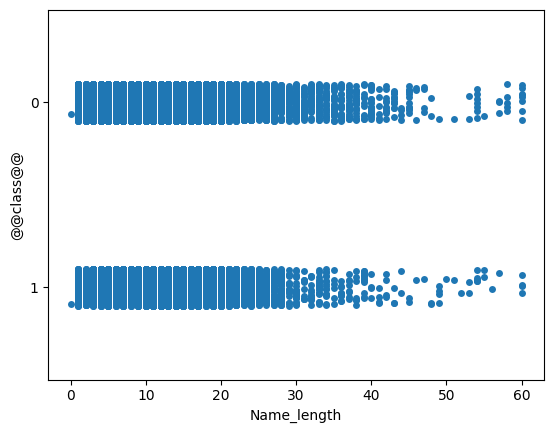

In [ ]:
sns.stripplot(x=df['Name_length'], y=df['@@class@@'].astype('category'))

In [ ]:
discrete

,Has_location,Has_username,Has_Image,Contain_URL,Sent_level,Has_Uword,Posted_holiday,Has_number,Has_rt,Has_org,Has_tvshow,Posted_noon,Posted_weeke,Posted_eve,Has_excl,Num_hashtag,Opt_len,Has_suggest,Has_video
0,0,0,0,0,negative,0,1,1,0,0,0,0,1,0,0,1.0,0,0,0
1,0,1,0,0,neutro_objective,0,1,0,0,0,0,0,0,1,0,0.0,0,0,0
2,0,0,0,1,negative,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0
3,0,0,0,1,negative,1,1,0,0,0,0,0,0,0,0,0.0,0,0,0
4,0,0,0,1,negative,0,1,1,0,0,0,0,0,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,0,0,0,negative,1,1,0,0,0,0,0,0,0,0,0.0,0,0,0
79996,0,0,1,1,negative,0,1,0,0,0,0,0,1,1,0,0.0,0,0,1
79997,0,0,0,0,negative,0,1,0,0,0,0,0,0,0,0,0.0,0,1,0
79998,0,0,0,0,negative,0,1,0,0,0,0,0,1,0,0,0.0,0,0,0


In [ ]:
def func(subset, attr):
    unique, counts = np.unique(subset[attr], return_counts=True)
    
    return unique, counts/np.sum(counts) 

In [ ]:
def get_props(df, attr, cls):
    
    gbobj = df.groupby('@@class@@').apply(func, attr=attr)
    confdict = {cls: [], attr: [], 'proportion': []}
    
    for i in gbobj.index:
        
        for val in gbobj[i][0]:
            idx = np.where(gbobj[i][0] == val)[0][0]
            
            confdict[cls].append(i)
            confdict[attr].append(val)
            confdict['proportion'].append(gbobj[i][1][idx])

    return pd.DataFrame(confdict)

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

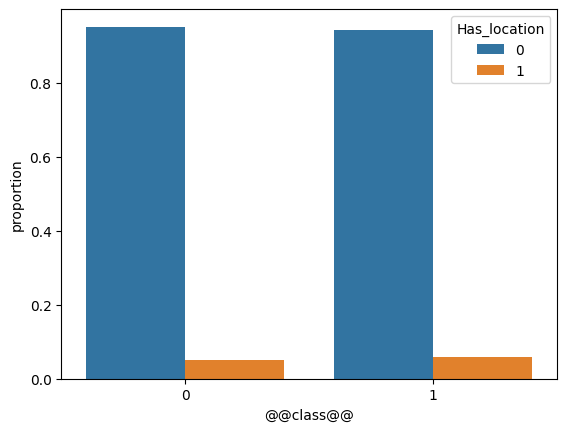

In [ ]:
sns.barplot(data=get_props(df, 'Has_location', '@@class@@'), x='@@class@@', y='proportion', hue='Has_location')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

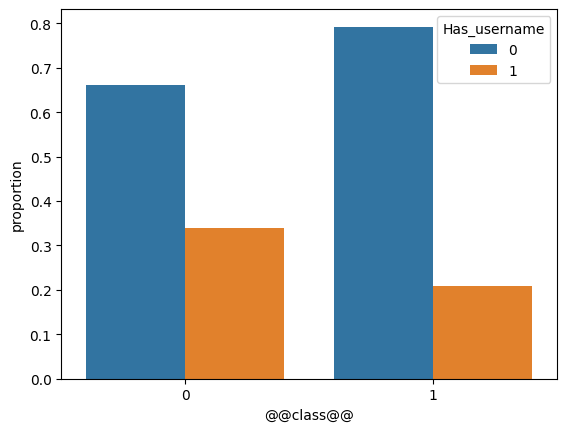

In [ ]:
sns.barplot(data=get_props(df, 'Has_username', '@@class@@'), x='@@class@@', y='proportion', hue='Has_username')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

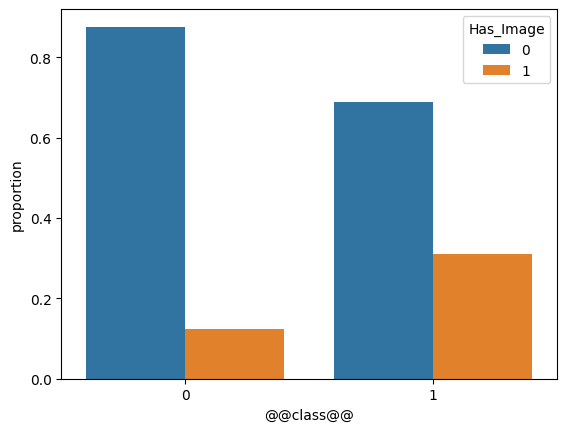

In [ ]:
sns.barplot(data=get_props(df, 'Has_Image', '@@class@@'), x='@@class@@', y='proportion', hue='Has_Image')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

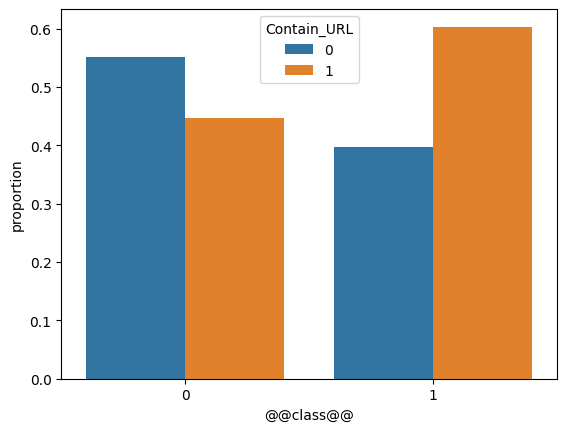

In [ ]:
sns.barplot(data=get_props(df, 'Contain_URL', '@@class@@'), x='@@class@@', y='proportion', hue='Contain_URL')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

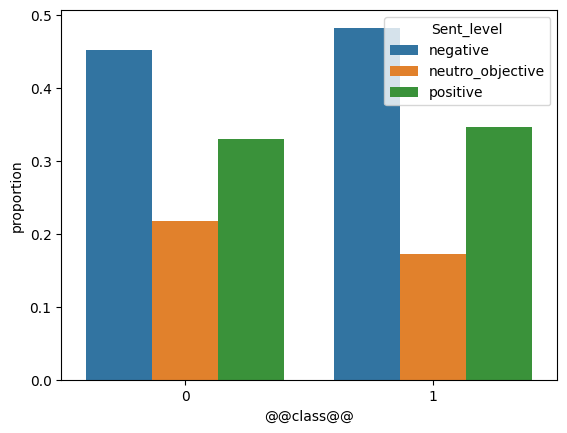

In [ ]:
sns.barplot(data=get_props(df, 'Sent_level', '@@class@@'), x='@@class@@', y='proportion', hue='Sent_level')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

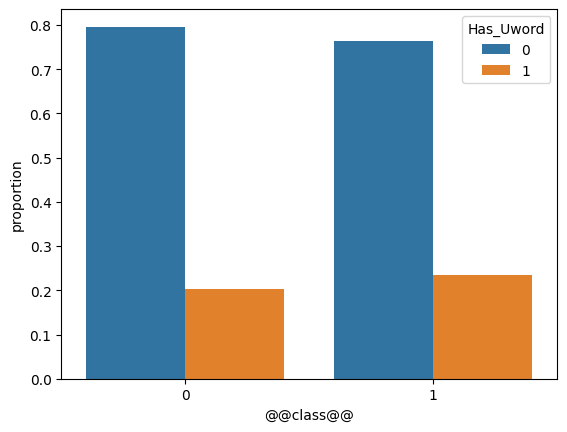

In [ ]:
sns.barplot(data=get_props(df, 'Has_Uword', '@@class@@'), x='@@class@@', y='proportion', hue='Has_Uword')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

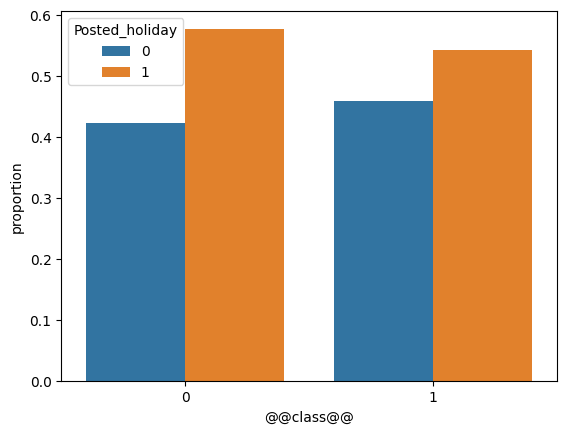

In [ ]:
sns.barplot(data=get_props(df, 'Posted_holiday', '@@class@@'), x='@@class@@', y='proportion', hue='Posted_holiday')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

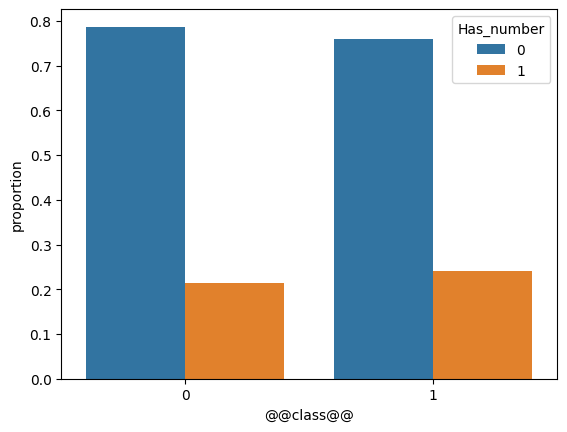

In [ ]:
sns.barplot(data=get_props(df, 'Has_number', '@@class@@'), x='@@class@@', y='proportion', hue='Has_number')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

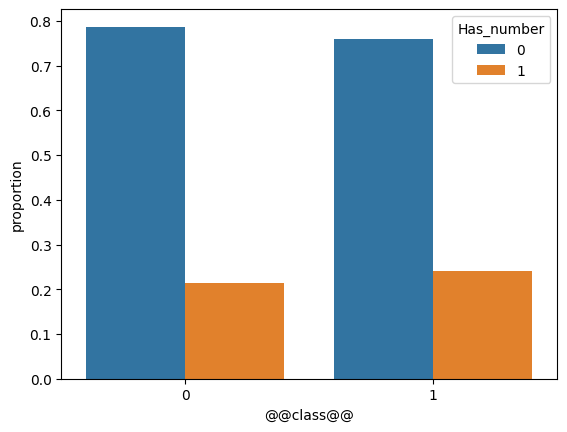

In [ ]:
sns.barplot(data=get_props(df, 'Has_number', '@@class@@'), x='@@class@@', y='proportion', hue='Has_number')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

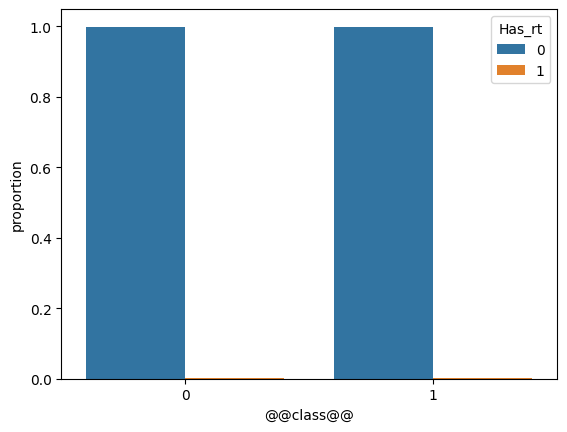

In [ ]:
sns.barplot(data=get_props(df, 'Has_rt', '@@class@@'), x='@@class@@', y='proportion', hue='Has_rt')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

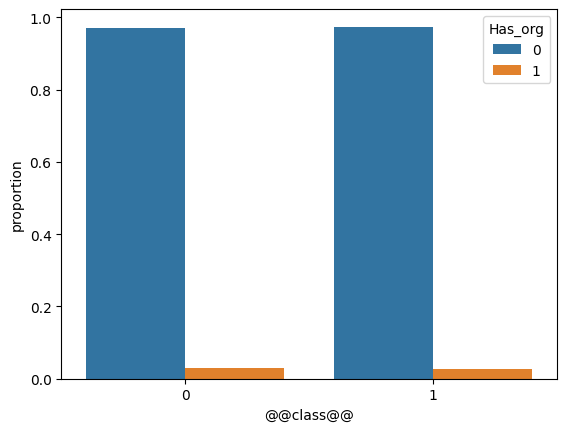

In [ ]:
sns.barplot(data=get_props(df, 'Has_org', '@@class@@'), x='@@class@@', y='proportion', hue='Has_org')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

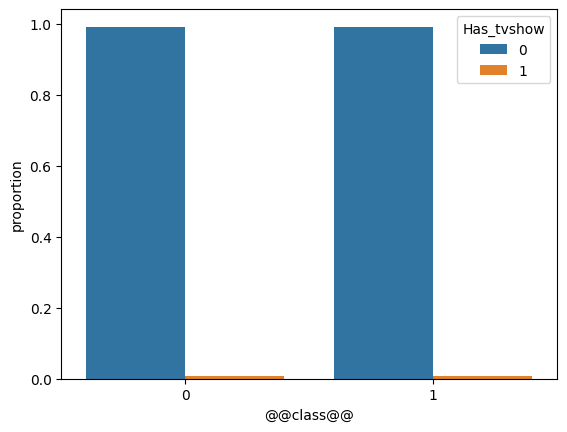

In [ ]:
sns.barplot(data=get_props(df, 'Has_tvshow', '@@class@@'), x='@@class@@', y='proportion', hue='Has_tvshow')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

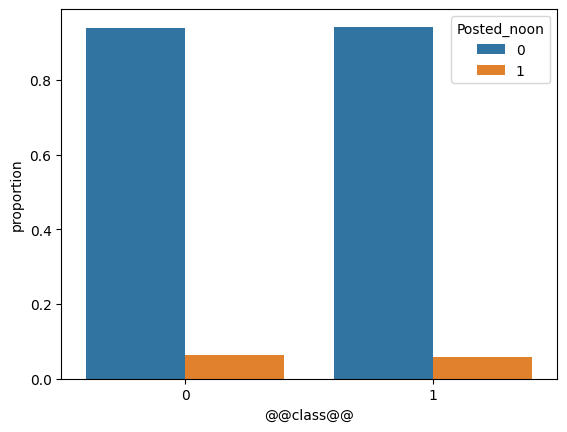

In [ ]:
sns.barplot(data=get_props(df, 'Posted_noon', '@@class@@'), x='@@class@@', y='proportion', hue='Posted_noon')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

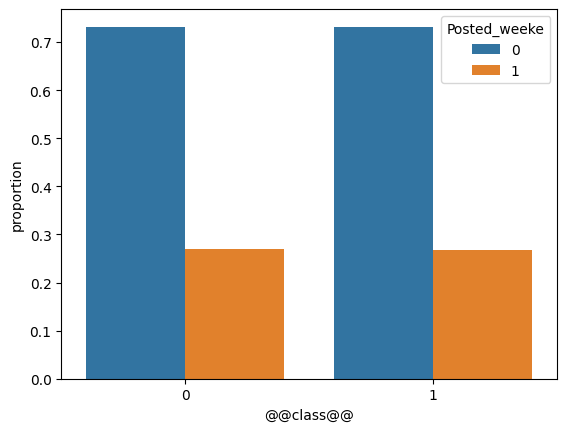

In [ ]:
sns.barplot(data=get_props(df, 'Posted_weeke', '@@class@@'), x='@@class@@', y='proportion', hue='Posted_weeke')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

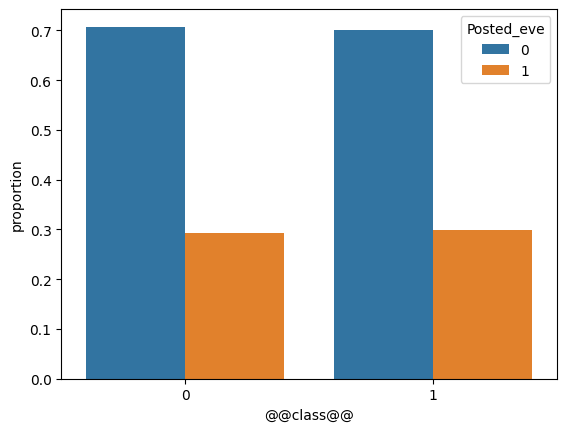

In [ ]:
sns.barplot(data=get_props(df, 'Posted_eve', '@@class@@'), x='@@class@@', y='proportion', hue='Posted_eve')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

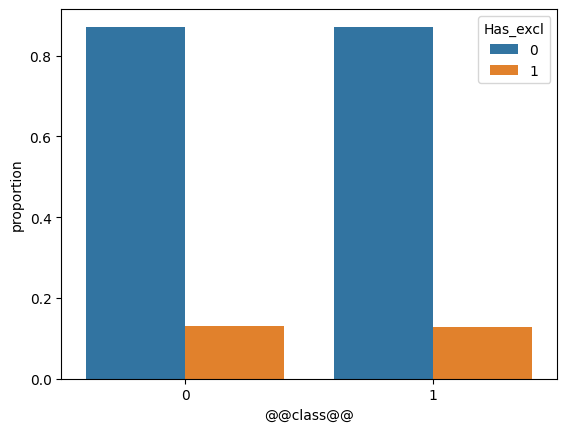

In [ ]:
sns.barplot(data=get_props(df, 'Has_excl', '@@class@@'), x='@@class@@', y='proportion', hue='Has_excl')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

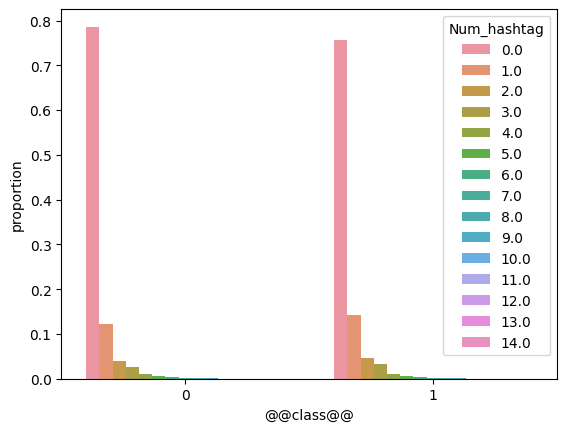

In [ ]:
sns.barplot(data=get_props(df, 'Num_hashtag', '@@class@@'), x='@@class@@', y='proportion', hue='Num_hashtag')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

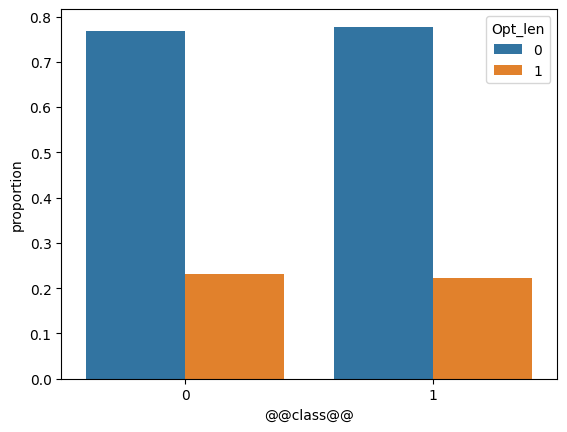

In [ ]:
sns.barplot(data=get_props(df, 'Opt_len', '@@class@@'), x='@@class@@', y='proportion', hue='Opt_len')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

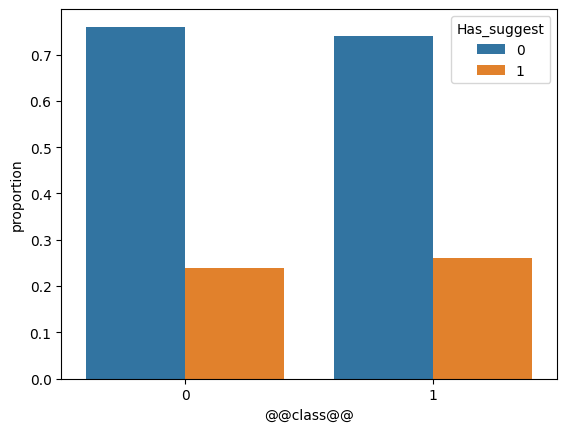

In [ ]:
sns.barplot(data=get_props(df, 'Has_suggest', '@@class@@'), x='@@class@@', y='proportion', hue='Has_suggest')

<AxesSubplot: xlabel='@@class@@', ylabel='proportion'>

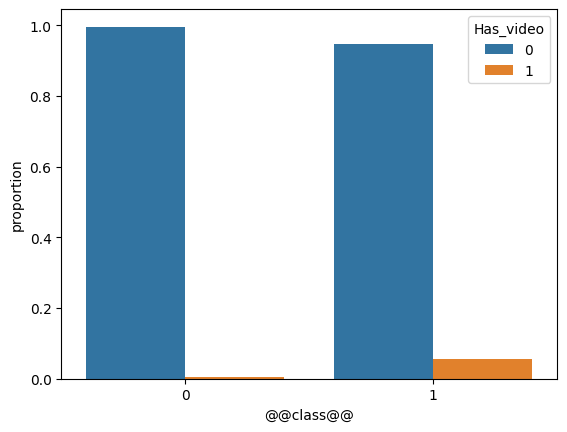

In [ ]:
sns.barplot(data=get_props(df, 'Has_video', '@@class@@'), x='@@class@@', y='proportion', hue='Has_video')